## LOAN PREDICTION--what we are doing in this project

* data selection
* data description : A story of data and the features present in the data
* performing both statistical and graphical data anlaysis
* data transformation and derivation of new attributes. If necessary
* selection of machine learning algorithms based on the patterns observed in EDA
* data standardization and normalization
* creation of both training and test sets
* modeltrainng using machine learning algorithms
* calculation of model accuracy
* hyper parameter tuning for better accuracy
* saving the created model file using pickle
* deployment strategies ofr model
* production deployment and testing

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df2=pd.read_csv('loan_approval.csv')

In [3]:
df=pd.read_csv('loan_approval.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**This dataset is downloaded from kaggle and we will use this dataset to for our loan prediction project**

**1)Loan_ID : ID of loan**

**2)Gender : Gender of applicant**

**3)Married : If the applicant married or note**

**4)Dependents : If the applicant has anyone depended on him**

**5)Education : Education of applicant**

**6)Self_Employed : working for oneself as a freelance or the owner of a business rather than for an employer**

**7)ApplicantIncome : income of appicant**	

**8)CoapplicantIncome : income of co applicant**	

**9)LoanAmount : the amount of loan in thousands**	

**10)Loan_Amount_Term : term of loan in months**

**11)Credit_History : credit history meets guidelines**	

**12)Property_Area : urban/semiurban/loan approval**

**13)Loan_status : if loan has approved or not**

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

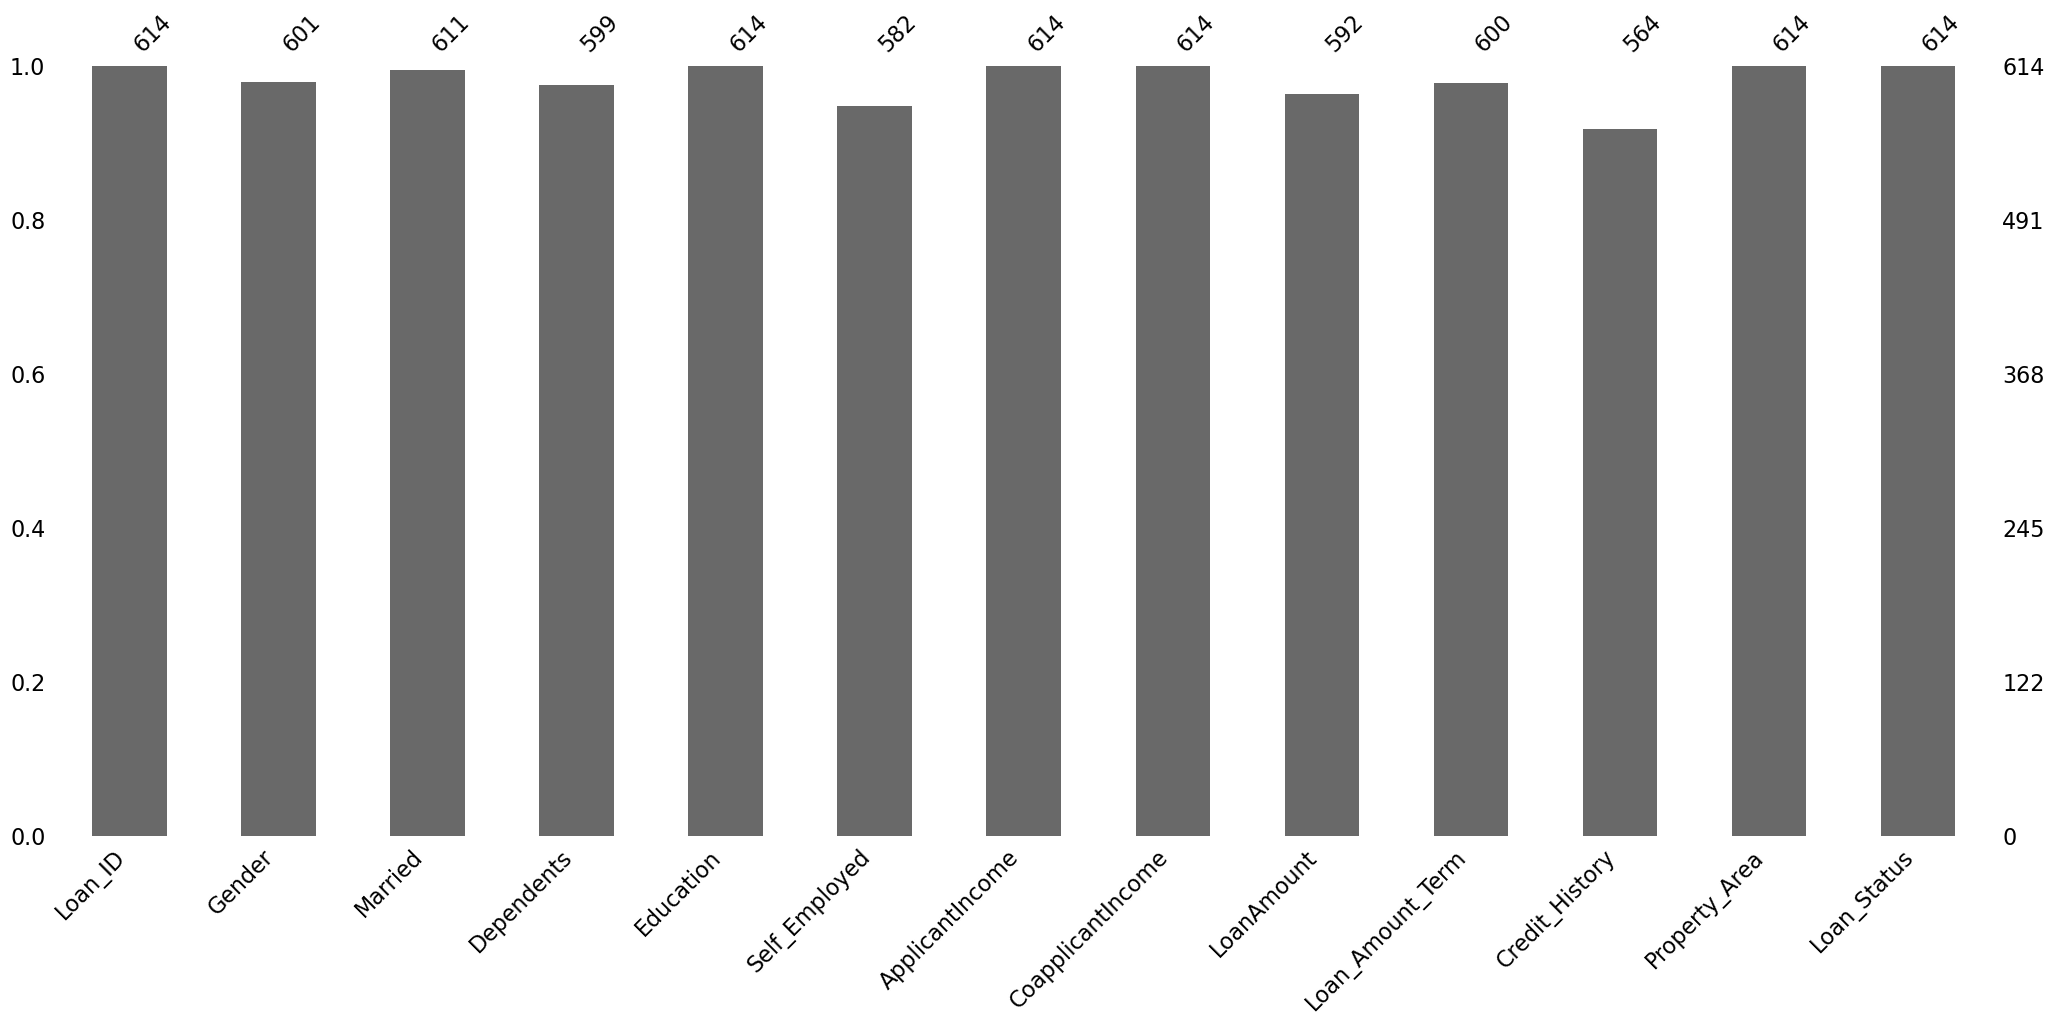

In [7]:
import missingno as msno

msno.bar(df)

In [8]:
df.describe()     #by default integer cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df[['ApplicantIncome', 'CoapplicantIncome']]

,ApplicantIncome,CoapplicantIncome
0,5849,0.0
1,4583,1508.0
2,3000,0.0
3,2583,2358.0
4,6000,0.0
...,...,...
609,2900,0.0
610,4106,0.0
611,8072,240.0
612,7583,0.0


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## DATA PREPROCESSING

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Handling numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# Handling categorical data
df['Gender'].mode()[0]

'Male'

In [15]:
# Handling categorical data

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## EXPLORATORY DATA ANALYSIS

<AxesSubplot: xlabel='Gender', ylabel='count'>

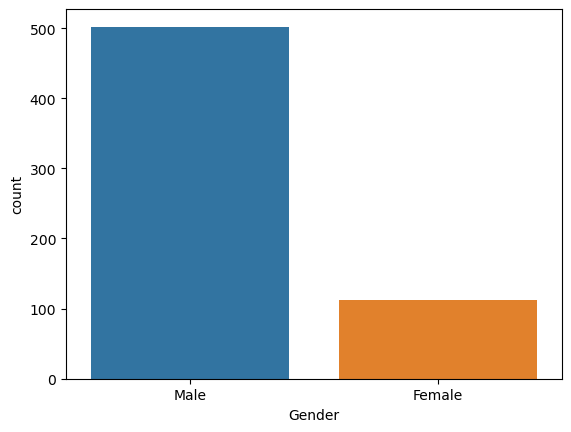

In [18]:
# catgeorical data


sns.countplot(x ='Gender', data = df)

<AxesSubplot: xlabel='Education', ylabel='count'>

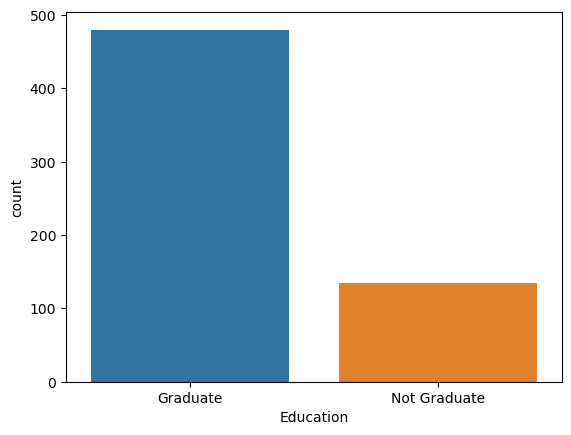

In [19]:
sns.countplot(x ='Education', data = df)

<AxesSubplot: xlabel='Married', ylabel='count'>

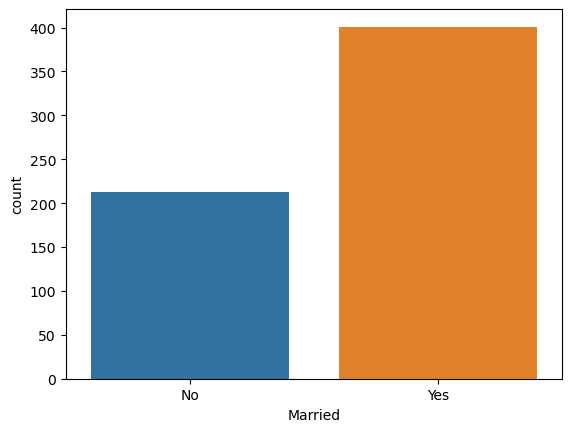

In [20]:
sns.countplot(x ='Married', data = df)

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

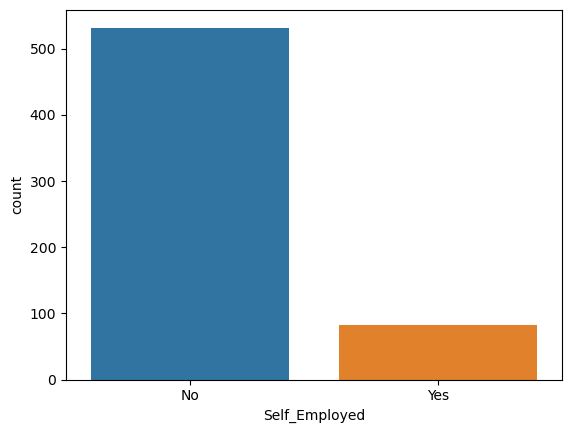

In [21]:
sns.countplot(x ='Self_Employed', data = df)

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

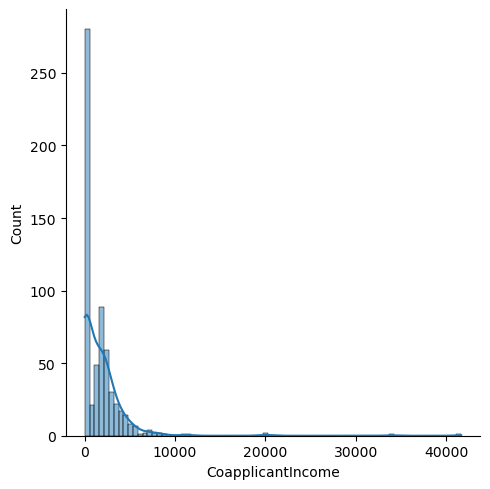

In [23]:
# Numerical data

sns.displot(df.CoapplicantIncome, kde=True) # its not normally distributed

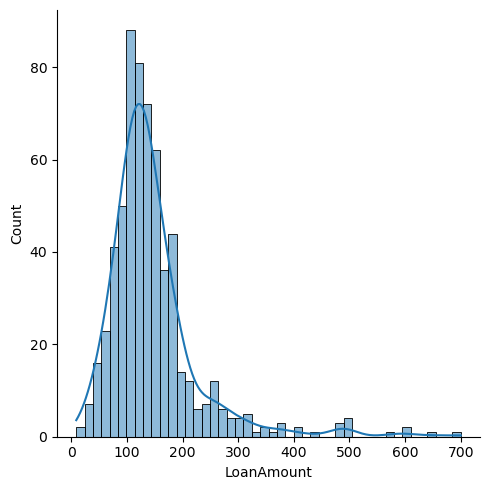

In [24]:
sns.displot(df.LoanAmount, kde=True) # its not normally distributed

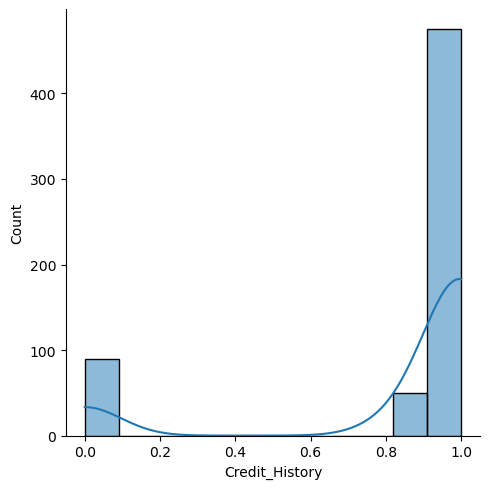

In [25]:
sns.displot(df.Credit_History, kde=True) # its not normally distributed

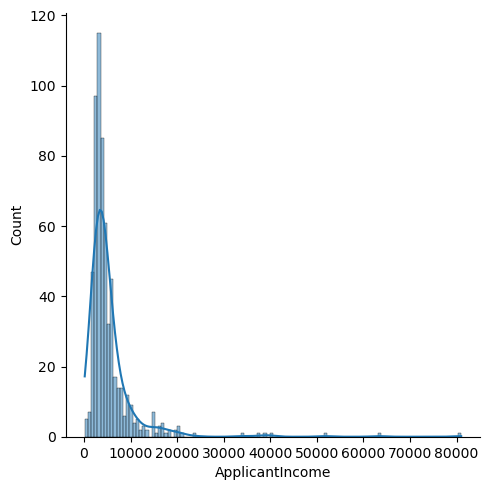

In [26]:
sns.displot(df.ApplicantIncome, kde=True) # its not normally distributed

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
# Data transformation

df['ApplicantincomeLog'] = np.log(df['ApplicantIncome'])

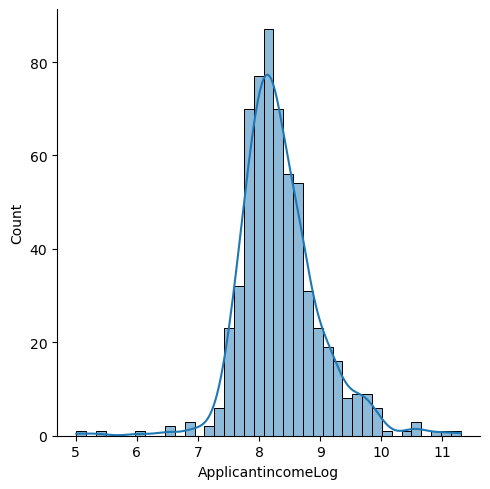

In [29]:
sns.displot(df.ApplicantincomeLog, kde=True)  # now its normally distributed

In [30]:
df['CoapplicantincomeLog'] = np.log(df['CoapplicantIncome'])

C:\Users\91974\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


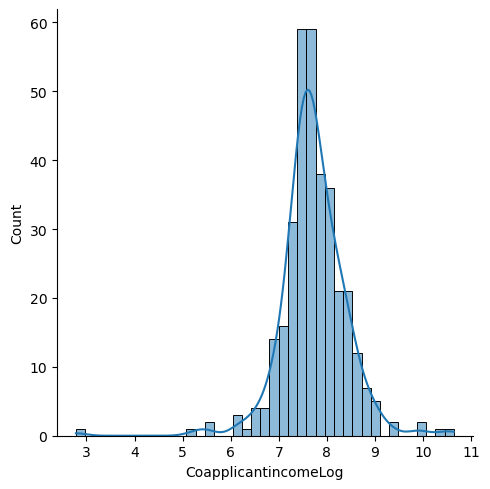

In [31]:
sns.displot(df.CoapplicantincomeLog, kde=True)

In [32]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])

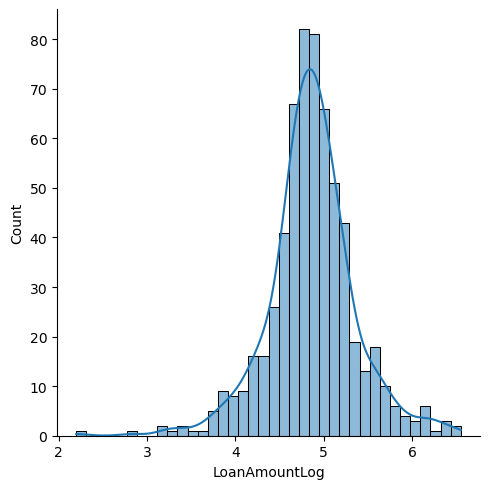

In [33]:
sns.displot(df.LoanAmountLog, kde=True)

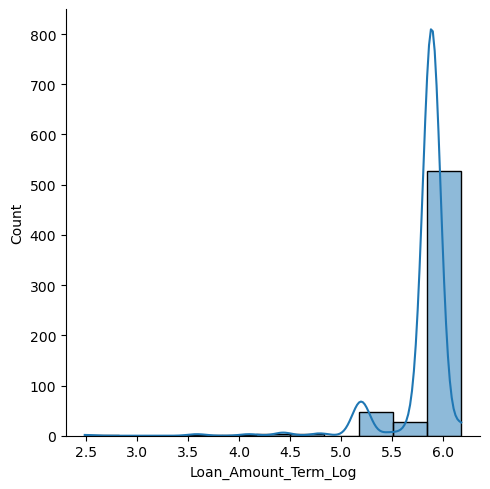

In [34]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.displot(df.Loan_Amount_Term_Log, kde=True)

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantincomeLog,CoapplicantincomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,7.318540,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,7.765569,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104


In [36]:
cols=['Loan_ID','ApplicantIncome','CoapplicantIncome',
      'LoanAmount','Loan_Amount_Term','CoapplicantincomeLog'] #dropping CoapplicantincomeLog because of null values and it doesnt seem neccessary

In [37]:
df=df.drop(columns=cols, axis=1)

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantincomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104


In [39]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [40]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Handling categorical data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantincomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [42]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantincomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log'],
      dtype='object')

In [43]:
cols= ['Gender', 'Married','Education','Self_Employed','Property_Area', 'Loan_Status', 'Dependents']

In [44]:
df=pd.get_dummies(df, columns=cols, drop_first=True)

In [45]:
df.head()

,Credit_History,ApplicantincomeLog,LoanAmountLog,Loan_Amount_Term_Log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,1.0,8.674026,4.986426,5.886104,1,0,0,0,0,1,1,0,0,0
1,1.0,8.430109,4.852030,5.886104,1,1,0,0,0,0,0,1,0,0
2,1.0,8.006368,4.189655,5.886104,1,1,0,1,0,1,1,0,0,0
3,1.0,7.856707,4.787492,5.886104,1,1,1,0,0,1,1,0,0,0
4,1.0,8.699515,4.948760,5.886104,1,0,0,0,0,1,1,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   ApplicantincomeLog       614 non-null    float64
 2   LoanAmountLog            614 non-null    float64
 3   Loan_Amount_Term_Log     614 non-null    float64
 4   Gender_Male              614 non-null    uint8  
 5   Married_Yes              614 non-null    uint8  
 6   Education_Not Graduate   614 non-null    uint8  
 7   Self_Employed_Yes        614 non-null    uint8  
 8   Property_Area_Semiurban  614 non-null    uint8  
 9   Property_Area_Urban      614 non-null    uint8  
 10  Loan_Status_Y            614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
dtypes: float64(4), uint8(10)
m

In [47]:
df.describe()

,Credit_History,ApplicantincomeLog,LoanAmountLog,Loan_Amount_Term_Log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842199,8.341213,4.862066,5.802065,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990,0.687296,0.166124,0.164495,0.083062
std,0.349681,0.645263,0.496575,0.312482,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229,0.463973,0.372495,0.371027,0.276201
min,0.000000,5.010635,2.197225,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.964677,4.607658,5.886104,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.246040,4.859812,5.886104,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,8.664750,5.104426,5.886104,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,11.302204,6.551080,6.173786,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df.columns

Index(['Credit_History', 'ApplicantincomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [49]:
df=df.drop(columns=['Property_Area_Semiurban'])

In [50]:
dict = {'Gender_Male':'Gender',
       'Married_Yes':'Married',
       'Self_Employed_Yes':'Self_Employed',
       'Loan_Status_Y':'Loan_Status',
       'Property_Area_Urban':'Property_Area'}

In [51]:
df.rename(columns=dict,inplace=True)

In [52]:
df.head()

,Credit_History,ApplicantincomeLog,LoanAmountLog,Loan_Amount_Term_Log,Gender,Married,Education_Not Graduate,Self_Employed,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,1.0,8.674026,4.986426,5.886104,1,0,0,0,1,1,0,0,0
1,1.0,8.430109,4.852030,5.886104,1,1,0,0,0,0,1,0,0
2,1.0,8.006368,4.189655,5.886104,1,1,0,1,1,1,0,0,0
3,1.0,7.856707,4.787492,5.886104,1,1,1,0,1,1,0,0,0
4,1.0,8.699515,4.948760,5.886104,1,0,0,0,1,1,0,0,0


### Train_Test_split

In [53]:
# specify input and output attributes

x = df.drop(columns=['Loan_Status'], axis=1)
y= df['Loan_Status']

In [54]:
x

,Credit_History,ApplicantincomeLog,LoanAmountLog,Loan_Amount_Term_Log,Gender,Married,Education_Not Graduate,Self_Employed,Property_Area,Dependents_1,Dependents_2,Dependents_3+
0,1.0,8.674026,4.986426,5.886104,1,0,0,0,1,0,0,0
1,1.0,8.430109,4.852030,5.886104,1,1,0,0,0,1,0,0
2,1.0,8.006368,4.189655,5.886104,1,1,0,1,1,0,0,0
3,1.0,7.856707,4.787492,5.886104,1,1,1,0,1,0,0,0
4,1.0,8.699515,4.948760,5.886104,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,4.262680,5.886104,0,0,0,0,0,0,0,0
610,1.0,8.320205,3.688879,5.192957,1,1,0,0,0,0,0,1
611,1.0,8.996157,5.533389,5.886104,1,1,0,0,1,1,0,0
612,1.0,8.933664,5.231109,5.886104,1,1,0,0,1,0,1,0


In [55]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: uint8

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [57]:
y_test.head()

350    1
377    1
163    1
609    1
132    1
Name: Loan_Status, dtype: uint8

### Model Training

In [58]:
accuracy_list=[]
cv_score=[]

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#### RandomForestClassifier

Accuracy Score : 75.32

CV_Score : 79.78



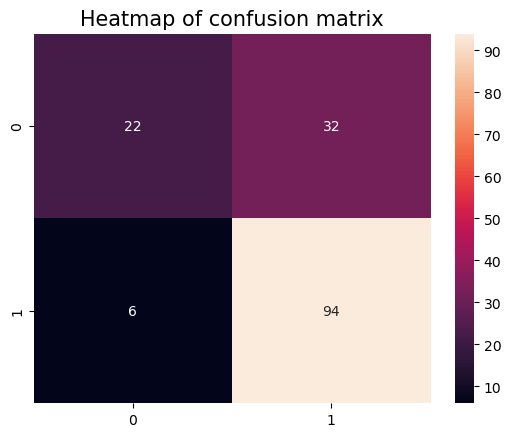

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()

rf_model.fit(x_train, y_train)

rf_prediction=rf_model.predict(x_test)

rf_accuracy=(round(rf_model.score(x_test, y_test), 4)*100) #precentage

print("Accuracy Score : {}\n".format(rf_accuracy))

rf_score=(round(cross_val_score(rf_model, x_train, y_train, cv=10).mean(), 4)*100)

print("CV_Score : {}\n".format(rf_score))


cm=confusion_matrix(y_test, rf_prediction)
plt.title('Heatmap of confusion matrix', fontsize= 15)
sns.heatmap(cm, annot =True)
plt.show

accuracy_list.append(rf_accuracy)

cv_score.append(rf_score)

#### Logistic Regression

Accuracy Score : 77.92

CV_Score : 81.96



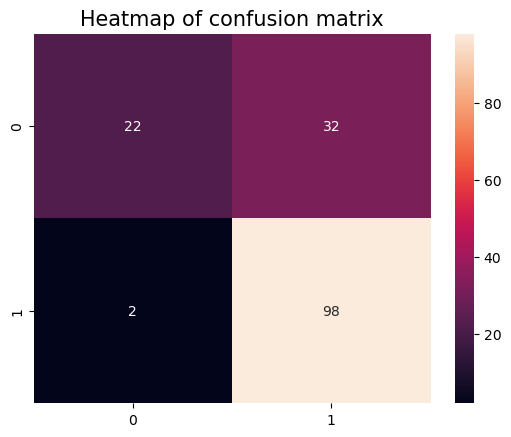

In [61]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model.fit(x_train, y_train)

lr_prediction=lr_model.predict(x_test)

lr_accuracy=(round(lr_model.score(x_test, y_test), 4)*100) #precentage

print("Accuracy Score : {}\n".format(lr_accuracy))

lr_score=(round(cross_val_score(lr_model, x_train, y_train, cv=10).mean(), 4)*100)

print("CV_Score : {}\n".format(lr_score))


cm=confusion_matrix(y_test, lr_prediction)
plt.title('Heatmap of confusion matrix', fontsize= 15)
sns.heatmap(cm, annot =True)
plt.show

accuracy_list.append(lr_accuracy)

cv_score.append(lr_score)

####  DecisionTreeClassifier

Accuracy Score : 69.48

CV_Score : 72.83



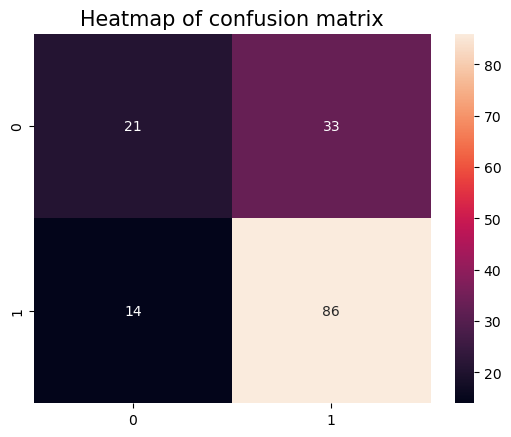

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()

dt_model.fit(x_train, y_train)

dt_prediction=dt_model.predict(x_test)

dt_accuracy=(round(dt_model.score(x_test, y_test), 4)*100) #precentage

print("Accuracy Score : {}\n".format(dt_accuracy))

dt_score=(round(cross_val_score(dt_model, x_train, y_train, cv=10).mean(), 4)*100)

print("CV_Score : {}\n".format(dt_score))


cm=confusion_matrix(y_test, dt_prediction)
plt.title('Heatmap of confusion matrix', fontsize= 15)
sns.heatmap(cm, annot =True)
plt.show

accuracy_list.append(dt_accuracy)

cv_score.append(dt_score)

In [63]:
accuracy_list

[75.32, 77.92, 69.48]

In [64]:
models=['Random Forest','Logistic Regression','Decision Tree']

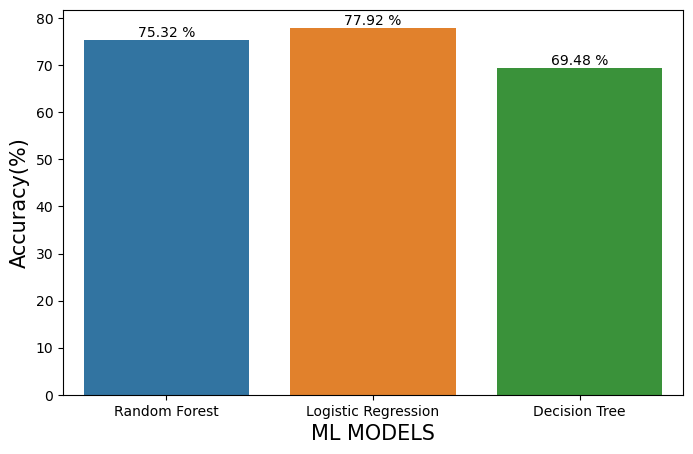

In [65]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=models,y=accuracy_list)
plt.xlabel("ML MODELS", fontsize=15)
plt.ylabel("Accuracy(%)", fontsize=15)
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x=p.get_x()
    y=p.get_y()
    ax.annotate(f"{height} %", (x+width/2, y+height*1.01), ha="center")
plt.show()

lets check the cv_score

In [66]:
cv_score

[79.78, 81.96, 72.83]

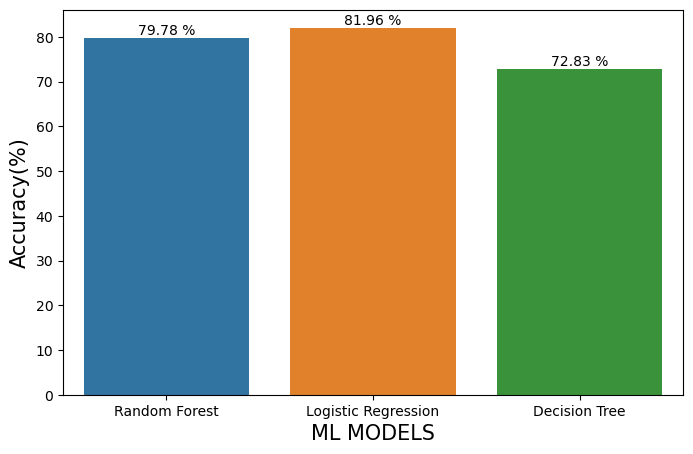

In [67]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x=models,y=cv_score)
plt.xlabel("ML MODELS", fontsize=15)
plt.ylabel("Accuracy(%)", fontsize=15)
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x=p.get_x()
    y=p.get_y()
    ax.annotate(f"{height} %", (x+width/2, y+height*1.01), ha="center")
plt.show()

In [68]:
# side by side comparison with bar chart

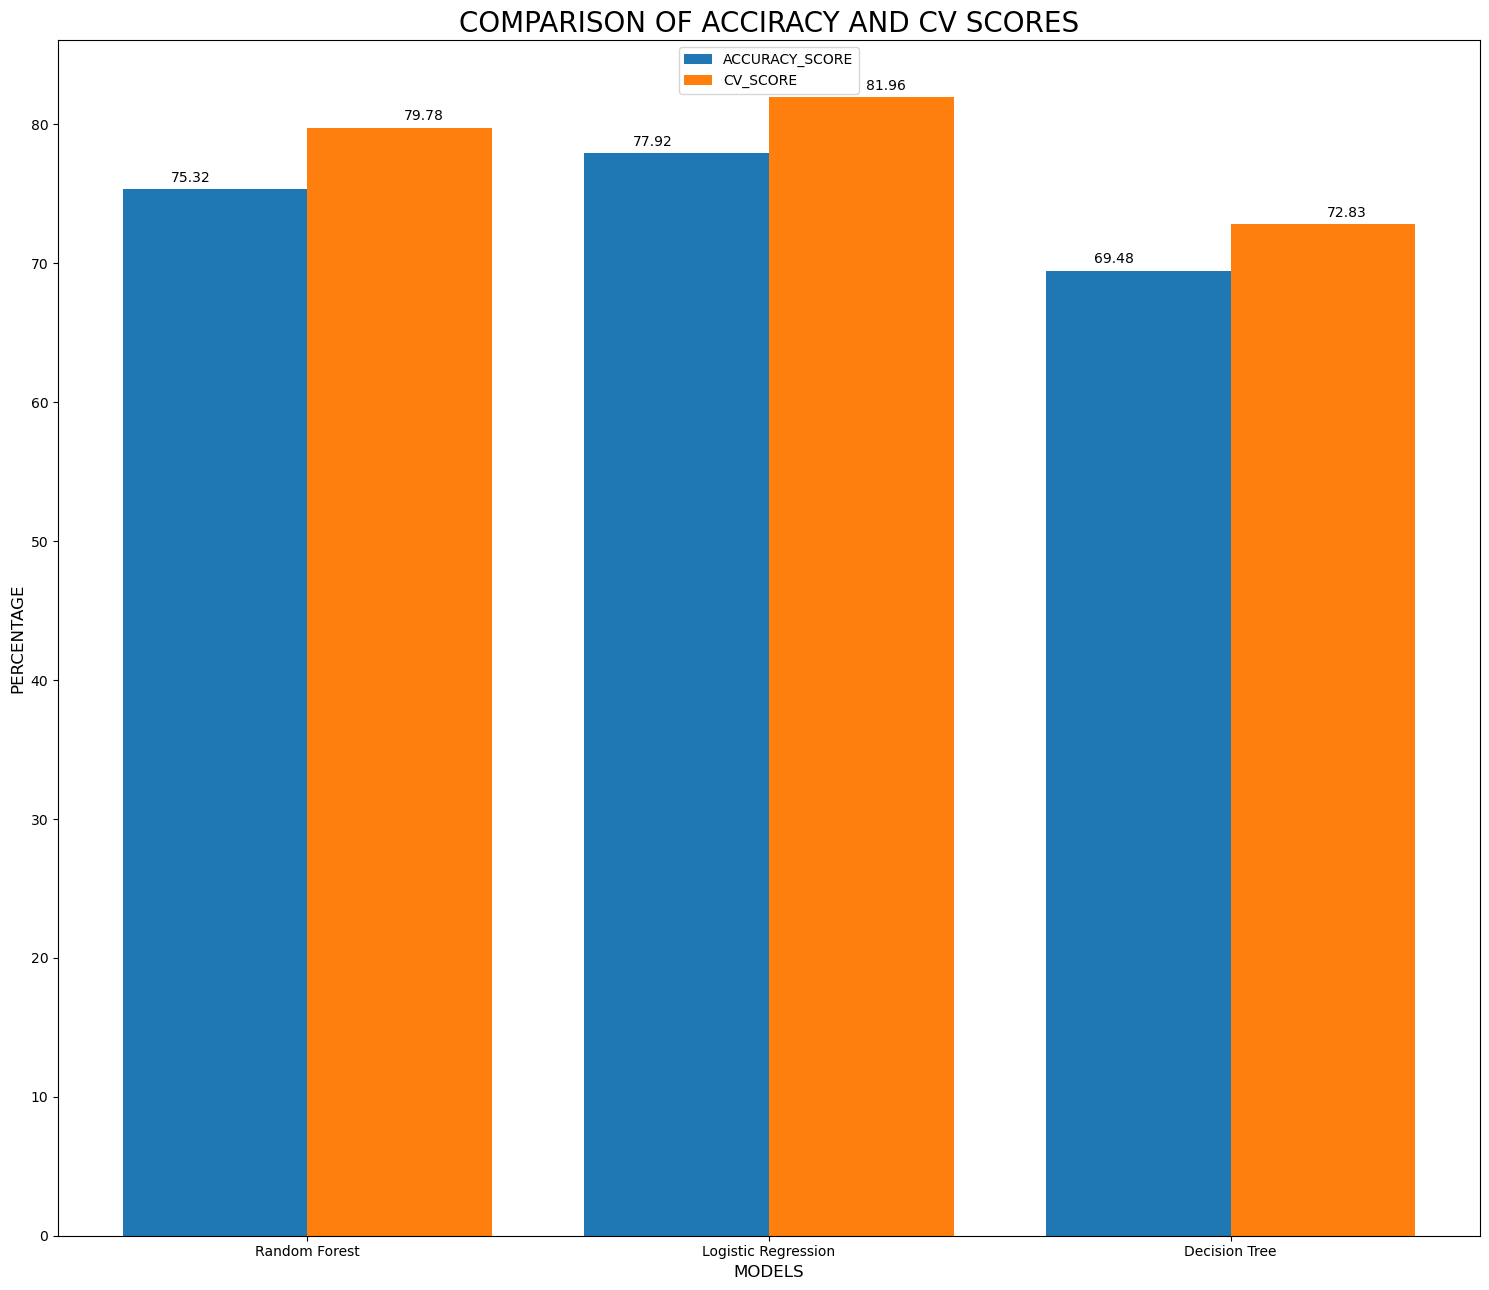

In [69]:
X_axis = np.arange(len(models))

fig, ax = plt.subplots(figsize=(15,13))
rects1=plt.bar(X_axis - 0.2, accuracy_list, 0.4, label = 'ACCURACY_SCORE')
rects2=plt.bar(X_axis + 0.2, cv_score, 0.4, label = 'CV_SCORE')
  
plt.xticks(X_axis, models)
plt.xlabel("MODELS", fontsize=12)
plt.ylabel("PERCENTAGE",  fontsize=12)
plt.title("COMPARISON OF ACCIRACY AND CV SCORES", fontsize=20)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
plt.legend(loc='upper center')

plt.show()

***From this we can see that accuracy score is same for both Random forest and Logistic regression with Decision tree bieng the lowest, so we again check with cross validation and we find that we got better results and Logistic regression has higher cv than Random forest, so we take Logistic regression as out prediction ml model***

#### Model save


In [71]:
import pickle
file=open('MLMODEL.pkl', 'wb')
pickle.dump(lr_model,  open('MLMODEL.pkl','wb'))